# 라이브러리

In [1]:
import pandas as pd

# 사용할 데이터

In [2]:
df = pd.read_csv('주차수요량.csv', encoding = 'euc_kr')
df.head(3)

,emd_nm,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수,버스탑승자수(1월),버스탑승자수(8월),mean_bus,1월방문객수,8월방문객수,mean_유동인구,주차수요량
0,건입동,1018933,763641,4279,750,9857,370,49873,59935,658848.0,4182419.0,4615997.0,52790496.0,52131648.0
1,구좌읍,565136,952715,9161,1738,16283,4,74276,86702,965868.0,4630025.0,6893152.0,69139062.0,68173194.0
2,노형동,4834174,4562480,59875,4476,56223,1587,294504,347773,3853662.0,13591022.0,14025682.0,165700224.0,161846562.0


In [3]:
df2 = df.loc[:, ['emd_nm', '주차수요량', 'WiFi 접속자수', '카드이용자수', '자동차등록수', '사업체수', '총인구수', '면수']]
df2.head(3)

,emd_nm,주차수요량,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수
0,건입동,52131648.0,1018933,763641,4279,750,9857,370
1,구좌읍,68173194.0,565136,952715,9161,1738,16283,4
2,노형동,161846562.0,4834174,4562480,59875,4476,56223,1587


# 상관관계

In [4]:
df2.corr()

,주차수요량,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수
주차수요량,1.000000,0.733350,0.898615,0.655927,0.885584,0.875585,0.519003
WiFi 접속자수,0.733350,1.000000,0.867376,0.628871,0.849985,0.815750,0.665062
카드이용자수,0.898615,0.867376,1.000000,0.752853,0.896040,0.882783,0.647017
자동차등록수,0.655927,0.628871,0.752853,1.000000,0.741112,0.628881,0.397458
사업체수,0.885584,0.849985,0.896040,0.741112,1.000000,0.901444,0.598933
총인구수,0.875585,0.815750,0.882783,0.628881,0.901444,1.000000,0.550492
면수,0.519003,0.665062,0.647017,0.397458,0.598933,0.550492,1.000000


# 정규화

In [5]:
from numpy import *
import pandas as np
x = np.array(df2["주차수요량"])
x_standard = (x-mean(x, axis = 0))/std(x, axis = 0)
x_standard

<PandasArray>
[-0.38130407065784594, -0.07195979745212074,   1.7344321764070345,
  -0.8276754982383058,  -0.7065687051364865, -0.49440116195526074,
  -0.5246427441688655,  -0.6376984135547734,   0.5289733275844605,
     2.08062633085934,     1.90593277448522,   0.3910890404710579,
  -0.6762802629391937,  -0.7844904943081016,   0.5950909133095794,
  -1.1657160155289032, -0.14707588848929212,   2.2918668562891877,
  -0.8971086881425917,  -0.9812751197330308,  0.14508303529126926,
   0.6005864902113764,  -1.1651819274185238,  -0.8589385123926448,
   0.1460676734670339, -0.09943131825961722]
Length: 26, dtype: float64

In [6]:
print('mean : ', mean(x_standard, axis = 0))
print('std : ', std(x_standard, axis = 0) )

mean :  1.0515093069767107e-16
std :  1.0


In [7]:
df3 = df2.copy()
df3['주차수요량'] = x_standard
df3

,emd_nm,주차수요량,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수
0,건입동,-0.381304,1018933,763641,4279,750,9857,370
1,구좌읍,-0.071960,565136,952715,9161,1738,16283,4
2,노형동,1.734432,4834174,4562480,59875,4476,56223,1587
3,도두동,-0.827675,141161,441864,9090,991,3257,897
4,봉개동,-0.706569,393438,362387,3873,269,4936,327
5,삼도1동,-0.494401,919731,614378,15174,1367,14345,151
6,삼도2동,-0.524643,1223869,795022,3530,1029,8662,618
7,삼양동,-0.637698,638591,1042792,12993,1000,25153,656
8,아라동,0.528973,1552059,2301873,18729,2049,34321,821
9,애월읍,2.080626,939748,2262602,22731,2514,36550,36


In [8]:
df3.corr()

,주차수요량,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수
주차수요량,1.000000,0.733350,0.898615,0.655927,0.885584,0.875585,0.519003
WiFi 접속자수,0.733350,1.000000,0.867376,0.628871,0.849985,0.815750,0.665062
카드이용자수,0.898615,0.867376,1.000000,0.752853,0.896040,0.882783,0.647017
자동차등록수,0.655927,0.628871,0.752853,1.000000,0.741112,0.628881,0.397458
사업체수,0.885584,0.849985,0.896040,0.741112,1.000000,0.901444,0.598933
총인구수,0.875585,0.815750,0.882783,0.628881,0.901444,1.000000,0.550492
면수,0.519003,0.665062,0.647017,0.397458,0.598933,0.550492,1.000000


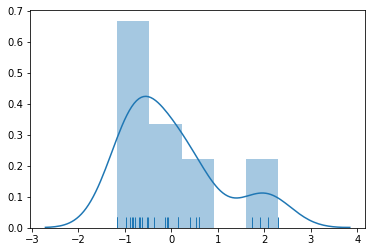

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(x_standard, rug = True)
plt.show()

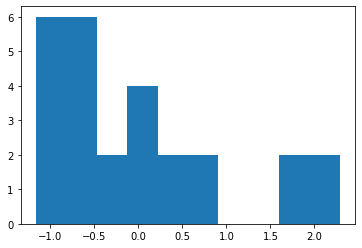

In [10]:
plt.hist(x_standard)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df2.iloc[:, 1:]
x

,주차수요량,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수
0,52131648.0,1018933,763641,4279,750,9857,370
1,68173194.0,565136,952715,9161,1738,16283,4
2,161846562.0,4834174,4562480,59875,4476,56223,1587
3,28984338.0,141161,441864,9090,991,3257,897
4,35264526.0,393438,362387,3873,269,4936,327
5,46266816.0,919731,614378,15174,1367,14345,151
6,44698590.0,1223869,795022,3530,1029,8662,618
7,38835906.0,638591,1042792,12993,1000,25153,656
8,99335550.0,1552059,2301873,18729,2049,34321,821
9,179799018.0,939748,2262602,22731,2514,36550,36


In [12]:
scaler.fit(x)
x_scaled = scalerx_scaled = scaler.fit_transform(x)
x_scaled

array([[-3.81304071e-01, -1.76011183e-01, -4.81509414e-01,
        -4.51097196e-01, -6.78214961e-01, -6.23843624e-01,
        -3.27275740e-01],
       [-7.19597975e-02, -5.85624229e-01, -3.31770619e-01,
        -3.00439483e-01,  8.73847015e-02, -1.99299932e-01,
        -1.13535979e+00],
       [ 1.73443218e+00,  3.26775880e+00,  2.52701410e+00,
         1.26458618e+00,  2.20905664e+00,  2.43939834e+00,
         2.35971413e+00],
       [-8.27675498e-01, -9.68318895e-01, -7.36343501e-01,
        -3.02630531e-01, -4.91464436e-01, -1.05988290e+00,
         8.36276981e-01],
       [-7.06568705e-01, -7.40604850e-01, -7.99286001e-01,
        -4.63626289e-01, -1.05094111e+00, -9.48957149e-01,
        -4.22214576e-01],
       [-4.94401162e-01, -2.65554378e-01, -5.99719542e-01,
        -1.14879296e-01, -2.00102621e-01, -3.27336918e-01,
        -8.10801443e-01],
       [-5.24642744e-01,  8.97121964e-03, -4.56656959e-01,
        -4.74211213e-01, -4.62018295e-01, -7.02793159e-01,
         2.2027848

In [14]:
import pandas as pd
c = pd.DataFrame(x_scaled, columns = x.columns)
c.to_csv('a.csv', encoding = 'euc_kr')

In [15]:
c

,주차수요량,WiFi 접속자수,카드이용자수,자동차등록수,사업체수,총인구수,면수
0,-0.381304,-0.176011,-0.481509,-0.451097,-0.678215,-0.623844,-0.327276
1,-0.071960,-0.585624,-0.331771,-0.300439,0.087385,-0.199300,-1.135360
2,1.734432,3.267759,2.527014,1.264586,2.209057,2.439398,2.359714
3,-0.827675,-0.968319,-0.736344,-0.302631,-0.491464,-1.059883,0.836277
4,-0.706569,-0.740605,-0.799286,-0.463626,-1.050941,-0.948957,-0.422215
5,-0.494401,-0.265554,-0.599720,-0.114879,-0.200103,-0.327337,-0.810801
6,-0.524643,0.008971,-0.456657,-0.474211,-0.462018,-0.702793,0.220278
7,-0.637698,-0.519321,-0.260433,-0.182185,-0.484490,0.386710,0.304178
8,0.528973,0.305207,0.736707,-0.005173,0.328378,0.992409,0.668478
9,2.080626,-0.247486,0.705606,0.118328,0.688706,1.139671,-1.064708


In [ ]:
c.corr()

In [ ]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.plot(x_scaled)
plt.show()